Nesse arquivo exploramos a possibilidade de transformar as séries,(como os Wavelets) porém aqui diferente dos Wavelets (tende a aumentar a dimensionalidade com uma descrição mais precisa da série) vamos seguir o caminho exatamente inverso, reduzir as dimensões.

Basicamente, estamos com o seguinte pensamento:

>Esses problemas com multiplas variaveis é dificil de se entender, e se for possível extrair as melhores informações de uma série e ainda reduzir a dimensionalidade dos dados?

Para responder isso usamos métodos como **PCA** e LDA;
No arquivo abaixo usamos os últimos **2 lags** e durante a construção de um modelo usamos o PCA para reduzir a dimensionalidade do nosso problema. 

Obs:By default, the function keeps only the PCs that are necessary to explain at least 95% of the variability in the data, but this can be changed through the argument thresh.[page 80](https://cran.r-project.org/web/packages/caret/caret.pdf)

In [12]:
library(caret)
library(kernlab)
library(pROC)

groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")



In [13]:
#Group 1
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 1
for (i in 1:length(allDataGroup1)){
     aa<- t(unlist(allDataGroup1[[i]][(nrow(allDataGroup1[[i]])-minStepsBack):nrow(allDataGroup1[[i]]),]))
    wtData <- rbind(wtData, aa)
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup1Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
head(frameDataFinal)
##use only lagged data

,target,X.RSS_anchor11,X.RSS_anchor12,RSS_anchor21,RSS_anchor22,RSS_anchor31,RSS_anchor32,RSS_anchor41,RSS_anchor42
1,Yes,0,-0.14286,0.04,-0.6,-0.047619,-0.28571,-0.05,-0.1
2,Yes,-0.33333,-0.14286,0.04,0.04,0.095238,0.14286,-0.1,0.05
3,Yes,-0.28571,-0.14286,-0.04,-0.08,-0.095238,0.14286,-0.05,0.35
4,Yes,-0.42857,-0.57143,-0.2,-0.52,0,0.047619,0.4,-0.15
5,Yes,-0.57143,-0.52381,-0.6,-0.44,0.57143,0.28571,0.9,0.8
6,Yes,-1,-0.47619,-0.32,-0.2,0.71429,0.52381,0.65,0.95


#### Média e Desvio padrão respectivamente.
##### Group 1, com Cross Validation tipo 10-fold

In [14]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup1 <- c()


for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training, preProcess=c("pca"),
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup1 <- c(allAccuracyGroup1,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup1)
sd(allAccuracyGroup1)

[1] 0.7066667

[1] 0.09269624

In [15]:
#Group 2
allDataGroup2<-list()
allDataGroup2Target<-list()
groups2 = groups[groups$dataset_ID==2, ]

index<-1
for (id in groups2$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup2[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup2Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 1
for (i in 1:length(allDataGroup2)){
     aa<- t(unlist(allDataGroup2[[i]][(nrow(allDataGroup2[[i]])-minStepsBack):nrow(allDataGroup2[[i]]),]))
    wtData <- rbind(wtData, aa)
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup2Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
head(frameDataFinal)
##use only lagged data

,target,X.RSS_anchor11,X.RSS_anchor12,RSS_anchor21,RSS_anchor22,RSS_anchor31,RSS_anchor32,RSS_anchor41,RSS_anchor42
1,Yes,0.066667,0.066667,-0.48718,-0.17949,-0.45455,-0.36364,-0.047619,-0.14286
2,Yes,0.86667,1,0.38462,0.84615,-0.59091,-0.81818,-0.7619,-0.7619
3,Yes,0.73333,0.73333,0.53846,0.53846,-0.81818,-0.90909,-0.61905,-0.57143
4,Yes,0.2,0.2,0.53846,0.23077,-0.86364,-0.72727,-1,-0.57143
5,Yes,0.68889,0.68889,0.69231,0.38462,-0.86364,-0.90909,-0.80952,-0.61905
6,Yes,0.64444,0.64444,0.64103,0.69231,-0.59091,-0.81818,-0.61905,-0.57143


#### Média e Desvio padrão respectivamente.
##### Group 2, com Cross Validation tipo 10-fold

In [16]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup2 <- c()

#By default, the function keeps only the PCs that are necessary to explain at least 95% of 
#the variability in the data, but this can be changed through the argument thresh
for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training, preProcess=c("pca"),
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup2 <- c(allAccuracyGroup2,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup2)
sd(allAccuracyGroup2)

[1] 0.7451613

[1] 0.07820687

In [17]:
#Group 3
allDataGroup3<-list()
allDataGroup3Target<-list()
groups3 = groups[groups$dataset_ID==3, ]

index<-1
for (id in groups2$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup3[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup3Target[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 1
for (i in 1:length(allDataGroup3)){
     aa<- t(unlist(allDataGroup3[[i]][(nrow(allDataGroup3[[i]])-minStepsBack):nrow(allDataGroup3[[i]]),]))
    wtData <- rbind(wtData, aa)
}
wtData <- as.data.frame(wtData)
data = unlist(allDataGroup3Target)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
head(frameDataFinal)
##use only lagged data

,target,X.RSS_anchor11,X.RSS_anchor12,RSS_anchor21,RSS_anchor22,RSS_anchor31,RSS_anchor32,RSS_anchor41,RSS_anchor42
1,Yes,0.066667,0.066667,-0.48718,-0.17949,-0.45455,-0.36364,-0.047619,-0.14286
2,Yes,0.86667,1,0.38462,0.84615,-0.59091,-0.81818,-0.7619,-0.7619
3,Yes,0.73333,0.73333,0.53846,0.53846,-0.81818,-0.90909,-0.61905,-0.57143
4,Yes,0.2,0.2,0.53846,0.23077,-0.86364,-0.72727,-1,-0.57143
5,Yes,0.68889,0.68889,0.69231,0.38462,-0.86364,-0.90909,-0.80952,-0.61905
6,Yes,0.64444,0.64444,0.64103,0.69231,-0.59091,-0.81818,-0.61905,-0.57143


#### Média e Desvio padrão respectivamente.
##### Group 3, com Cross Validation tipo 10-fold

In [18]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracyGroup3 <- c()

#By default, the function keeps only the PCs that are necessary to explain at least 95% of 
#the variability in the data, but this can be changed through the argument thresh
for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training, preProcess=c("pca"),
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracyGroup3 <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup3)
sd(allAccuracyGroup3)

[1] 0.6903226

[1] 0.08075262

In [19]:
#All Groups
allData<-list()
allDataTarget<-list()
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")

index<-1
for (id in targetAll$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allData[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataTarget[index]<-targetAll[[2]][id]
    index<-index+1
}
wtData <- NULL
minStepsBack = 1
for (i in 1:length(allData)){
     aa<- t(unlist(allData[[i]][(nrow(allData[[i]])-minStepsBack):nrow(allData[[i]]),]))
    wtData <- rbind(wtData, aa)
}
wtData <- as.data.frame(wtData)
data = unlist(allDataTarget)
target = factor(data,labels=c("No","Yes"))
frameDataFinal <- data.frame(cbind(target, wtData))
head(frameDataFinal)

,target,X.RSS_anchor11,X.RSS_anchor12,RSS_anchor21,RSS_anchor22,RSS_anchor31,RSS_anchor32,RSS_anchor41,RSS_anchor42
1,Yes,0,-0.14286,0.04,-0.6,-0.047619,-0.28571,-0.05,-0.1
2,Yes,-0.33333,-0.14286,0.04,0.04,0.095238,0.14286,-0.1,0.05
3,Yes,-0.28571,-0.14286,-0.04,-0.08,-0.095238,0.14286,-0.05,0.35
4,Yes,-0.42857,-0.57143,-0.2,-0.52,0,0.047619,0.4,-0.15
5,Yes,-0.57143,-0.52381,-0.6,-0.44,0.57143,0.28571,0.9,0.8
6,Yes,-1,-0.47619,-0.32,-0.2,0.71429,0.52381,0.65,0.95


#### Média e Desvio padrão respectivamente.
##### Todos os Groups em uma base apenas, com Cross Validation tipo 10-fold

In [20]:
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=10)
allAccuracy <- c()

for( i in 1:length(inTraining)){

    training <- frameDataFinal[ inTraining[[i]],]
    testing  <- frameDataFinal[-inTraining[[i]],]
    fitControl <- trainControl(method = "none", classProbs = TRUE)

    svmLinearFit <- train(target ~ ., data = training,preProcess=c("pca"),
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
    preds<- predict(svmLinearFit, newdata = testing)
    matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[i]]])
    allAccuracy <- c(allAccuracy,matrix[3]$overall[[1]])
}

mean(allAccuracy)
sd(allAccuracy)

[1] 0.6225806

[1] 0.02655718

#### Matrix de confusão
#### Todos os Groups em uma base apenas

In [21]:
#All groups datasets Confusion Matrix 
inTraining <- createDataPartition(frameDataFinal$target, p = .7, list = TRUE,times=1)
training <- frameDataFinal[ inTraining[[1]],]
testing  <- frameDataFinal[-inTraining[[1]],]
fitControl <- trainControl(method = "none", classProbs = TRUE)

svmLinearFit <- train(target ~ ., data = training,preProcess=c("pca"),
                     method = "svmLinear",
                     trControl = fitControl,
                     family=binomial)
preds<- predict(svmLinearFit, newdata = testing)
matrix <- confusionMatrix(preds,frameDataFinal$target[-inTraining[[1]]])
matrix

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  24  14
       Yes 22  33
                                          
               Accuracy : 0.6129          
                 95% CI : (0.5062, 0.7122)
    No Information Rate : 0.5054          
    P-Value [Acc > NIR] : 0.02405         
                                          
                  Kappa : 0.2243          
 Mcnemar's Test P-Value : 0.24335         
                                          
            Sensitivity : 0.5217          
            Specificity : 0.7021          
         Pos Pred Value : 0.6316          
         Neg Pred Value : 0.6000          
             Prevalence : 0.4946          
         Detection Rate : 0.2581          
   Detection Prevalence : 0.4086          
      Balanced Accuracy : 0.6119          
                                          
       'Positive' Class : No              
                                          

#### Curva ROC e AUC
#### Todos os Groups em uma base apenas


Call:
roc.default(response = classes, predictor = outcome, levels = c("No",     "Yes"))

Data: outcome in 46 controls (classes No) < 47 cases (classes Yes).
Area under the curve: 0.6563

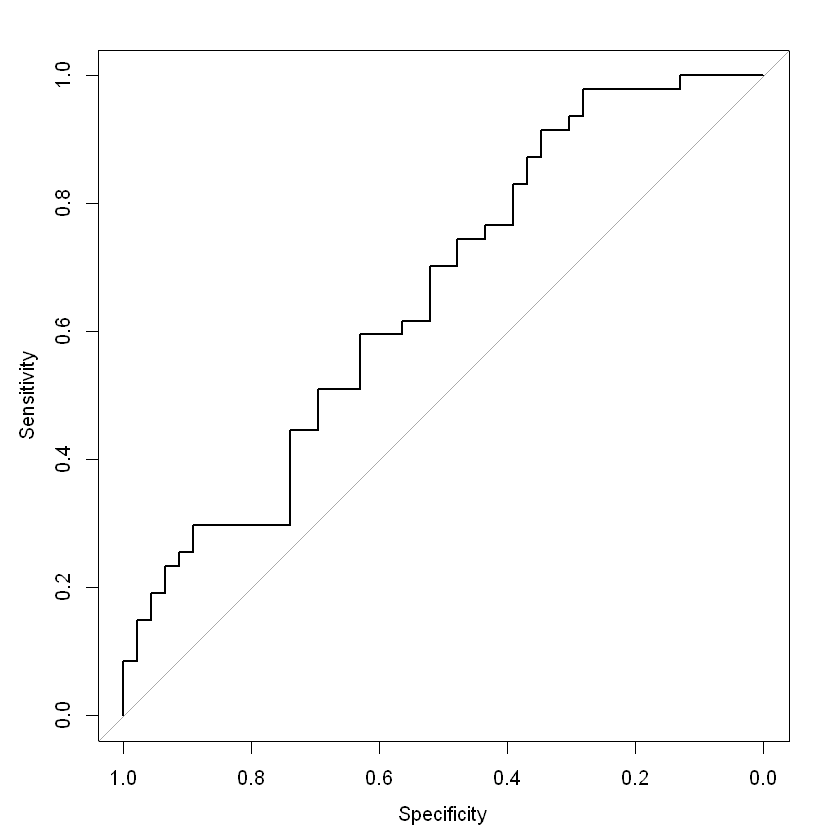

In [22]:
#ROC CURVE AND AUC
predsProb<- predict(svmLinearFit, newdata = testing,type="prob")
outcome<- predsProb[,2]
classes <- frameDataFinal$target[-inTraining[[1]]]
rocobj <- roc(classes, outcome,levels=c("No","Yes"))
plot(rocobj)